#### Тема проекта
# Зависимость оценки аниме от его характеристик
#### Какие данные вы взяли для работы, укажите их источник
Я взяла набор данных, который предлагает всесторонний обзор лучших аниме 2024 года и полезен для создания систем рекомендаций, визуализации тенденций популярности аниме и их оценок, прогнозирования оценок и популярности.
[Источник](https://www.kaggle.com/datasets/atefehmirnaseri/cell-phone-price?select=CellPhone_train.csv)
#### Описание каждого признака:
1. _battery_power_: Общий заряд батареи, который можно сохранить (мАч)
2. _blue_: устройство оснащено функцией blutooth или нет, да/нет (1/0)
3. _clock_speed_: скорость выполнения инструкций микропроцессором
4. _dual_sim_: устройство имеет две SIM-карты одновременно или нет
5. _fc_: качество изображения фронтальной камеры в мегапикселях
6. _four_g_: устройство имеет сеть 4G или нет
7. _int_memory_: объем встроенной памяти в гигабайтах
8. _m_dep_: глубина устройства в сантиметрах
9. _mobile_wt_: вес устройства
10. _n_cores_: количество процессорных ядер
11. _pc_: качество основной камеры в мегапикселях
12. _px_height_: высота разрешения в пикселях, 
13. _px_width_: ширина разрешения в пикселях
14. _ram_: оперативная память в мегабайтах
15. _sc_h_: высота экрана устройства в сантиметрах
16. _sc_w_: ширина экрана устройства в сантиметрах
17. _talk_time_: максимальное время разговора, которое может поддерживать полностью заряженный аккумулятор устройства
18. _three_g_: устройство имеет Сеть 3G или нет
19. _touch_screen_: устройство имеет сенсорный экран или нет
20. _wifi_: устройство имеет Wi-Fi или нет
21. _price_range_: цена устройства по категориям

In [2]:
# Подключаем все использованные библиотеки
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [3]:
# Подготовка Pandas для вывода и загрузка датасэта
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 250)
df = pd.read_csv("CellPhone_train.csv")

# EDA. Разведочный анализ данных

In [4]:
# EDA. 1. Сколько столбцов и строк в столбце?
rows, columns = df.shape
print(f'В датасэте {rows} строк и {columns} столбец.')

В датасэте 2000 строк и 21 столбец.


In [5]:
# EDA. 2. Узнайте тип данных каждого признака
data_types = df.dtypes
print("Тип данных для каждого признака:\n", data_types)

Тип данных для каждого признака:
 battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object


# EDA. 3. Определите тип данных для каждого объекта с точки зрения анализа
- _Непрерывный_: clock_speed, m_dep;
- _Дискретный_: battery_power, fc, int_memory, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time;
- _Номинальный_: blue, dual_sim, four_g, three_g, touch_screen, wifi;
- _Порядковый_: price_range;

In [6]:
# EDA. 4. Есть ли в данных выбросы?
missing_data = df.isnull().sum()
print("Выбросы в каждой из колонок:\n", missing_data)

# Обработка данных
# Для каждого числового столбца мы можем заполнить выбросы медианой.
numeric_columns = ['clock_speed', 'm_dep', 'battery_power', 'fc', 'int_memory', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
for column in numeric_columns:
    if df[column].isnull().sum() != 0:
        df[column].fillna(df[column].median(), inplace=True)
# Для категориальных столбцов, мы можем заполнить пропуски модой.
categorical_columns = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']
for column in categorical_columns:
    if df[column].isnull().sum() != 0:
        df[column].fillna(df[column].mode()[0], inplace=True)

# Проверяем на отсутствие пропусков
missing_data_after = df.isnull().sum()
print("Данные после обработки пропусков:\n", missing_data_after)

Выбросы в каждой из колонок:
 battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
Данные после обработки пропусков:
 battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


# Обоснование выбранных методов заполнения пропусков
Выбор метода обработки пропусков в данных зависит от типа данных в каждом столбце.
- __Числовые столбцы__: Для числовых столбцов я предпочитаю использовать медиану для заполнения пропусков. Это объясняется тем, что медиана менее подвержена влиянию выбросов и искажений данных по сравнению со средним значением. Если в наборе данных присутствуют экстремально высокие или низкие значения, они могут значительно исказить среднее значение, в то время как медиана останется стабильной. Именно поэтому заполнение пропусков медианой часто приводит к более точным результатам.
- __Категориальные столбцы__: Для категориальных столбцов я выбираю моду для заполнения пропусков. В этих столбцах отсутствует "среднее" значение, как в числовых. Применение моды является простым и часто эффективным методом заполнения пропусков в категориальных данных, так как она представляет собой наиболее часто встречающееся значение.

In [7]:
# EDA. 5. Посчитайте описательные статистики по переменным

def get_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]


# Выводим выбросы
outliers = {}
for column in numeric_columns:
    outliers[column] = get_outliers(df, column)
    print(f'Пропуски в {column}:\n', outliers[column])

# Удаляем выбросы
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR))]

Пропуски в clock_speed:
 Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

[0 rows x 21 columns]
Пропуски в m_dep:
 Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

[0 rows x 21 columns]
Пропуски в battery_power:
 Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

[0 rows x 21 columns]
Пропуски в fc:
       battery_power  blue  clock_speed  dual_sim  fc  ...  talk_time  three_g  touch_screen  wifi  price_range
95             1137     1          1.0         0  18  .

# С помощью каких критериев я определяю выбросы?

Я применяю метод межквартильного размаха (IQR). Это широко используемый статистический подход для определения аномалий путем расчета IQR. IQR представляет собой диапазон, который охватывает значения между первым и третьим квартилями данных. Первый квартиль - значение, ниже которого располагаются 25% всех данных. Третий квартиль - значение, ниже которого располагаются 75% всех данных. Иными словами, IQR охватывает центральные 50% данных.

In [8]:
# EDA. 6. Посчитайте описательные статистики по переменным
descriptive_stats = df.describe()
print("Описательная статистика:\n", descriptive_stats)

Описательная статистика:
        battery_power         blue  clock_speed     dual_sim           fc  ...    talk_time      three_g  touch_screen         wifi  price_range
count    1980.000000  1980.000000  1980.000000  1980.000000  1980.000000  ...  1980.000000  1980.000000   1980.000000  1980.000000  1980.000000
mean     1236.402020     0.494444     1.521162     0.509091     4.189899  ...    11.003535     0.760606      0.501515     0.505051     1.497980
std       439.568762     0.500095     0.817236     0.500044     4.168422  ...     5.458048     0.426821      0.500124     0.500101     1.117863
min       501.000000     0.000000     0.500000     0.000000     0.000000  ...     2.000000     0.000000      0.000000     0.000000     0.000000
25%       849.500000     0.000000     0.700000     0.000000     1.000000  ...     6.000000     1.000000      0.000000     0.000000     0.000000
50%      1224.000000     0.000000     1.500000     1.000000     3.000000  ...    11.000000     1.000000      1

In [9]:
# EDA. 7. Интерпретируйте описательные статистики для одного числового признака и для одного категориального
# Числовой признак: int_memory
print("Описательные статистика для свойства 'int_memory':\n", descriptive_stats['int_memory'])

# Категориальный признак: price_range
type_counts = df['price_range'].value_counts()
print("Описательные статистика для свойства 'price_range':\n", type_counts)

Описательные статистика для свойства 'int_memory':
 count    1980.000000
mean       32.055051
std        18.126820
min         2.000000
25%        16.000000
50%        32.000000
75%        48.000000
max        64.000000
Name: int_memory, dtype: float64
Описательные статистика для свойства 'price_range':
 price_range
2    496
0    496
1    495
3    493
Name: count, dtype: int64


# Visualization. Визуализация. Постройте не менее трех графиков (причем, нужно использовать как минимум два типа визуализаций)

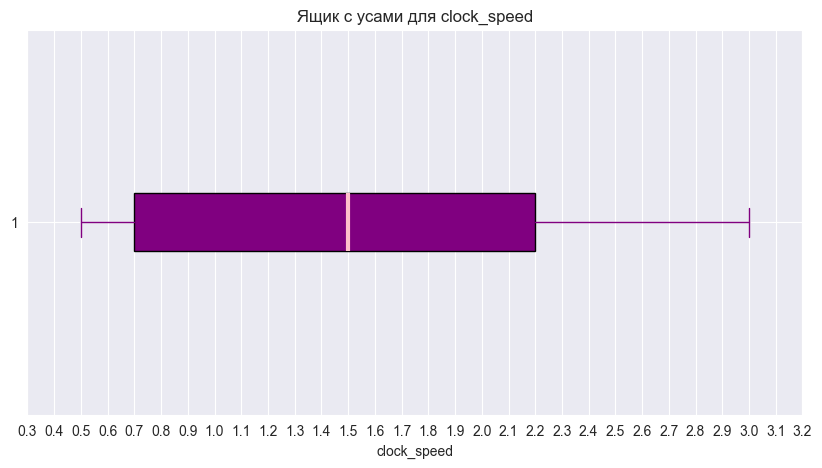

In [42]:
# Визуализация. 1. График ящик с усами для свойства 'clock_speed'
plt.figure(figsize=(10, 5))

bp = plt.boxplot(df['clock_speed'], vert=False, patch_artist=True, medianprops={'linewidth': 3})

# Задание цветов для ящика и усов
bp['boxes'][0].set(facecolor='purple')
bp['whiskers'][0].set(color='purple')
bp['whiskers'][1].set(color='purple')
bp['caps'][0].set(color='purple')
bp['caps'][1].set(color='purple')
bp['medians'][0].set(color='pink')

plt.title('Ящик с усами для clock_speed')
plt.xlabel('clock_speed')

plt.xticks(np.arange(min(df['clock_speed']) - 0.2, max(df['clock_speed']) + 0.2, 0.1))

plt.grid(True)
plt.show()

## Вывод по визуализации 1
Видим, что медиана рейтинга выпадает на 1.5, половина данных попадает в промежуток рейтинга от 0.7 до 2.2, предполагаемый максимум по данной диаграмме 2.2, предполагаемый минимум 0.7

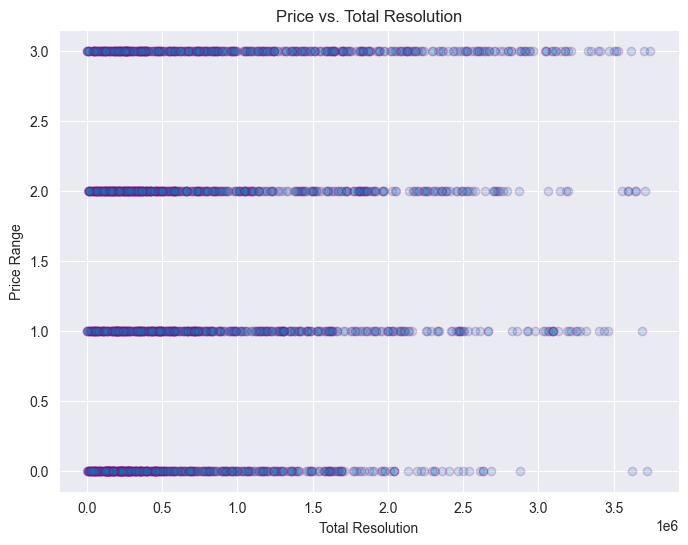

In [16]:
# Визуализация. 2. График зависимости Зависимость 'price_range' от 'total_resolution'
df['total_resolution'] = df['px_height'] * df['px_width']

plt.figure(figsize=(8, 6))
plt.scatter(df['total_resolution'], df['price_range'], alpha=0.2, edgecolor='purple')
plt.xlabel('Разрешение')
plt.ylabel('Ценовая категория')
plt.title('Ценовая категория от разрешения')
plt.grid(True)
plt.show()

## Вывод по визуализации 2
По данной диаграмме мы видим, что с ростом ценовой категории постепенно растёт и разрешение устройства

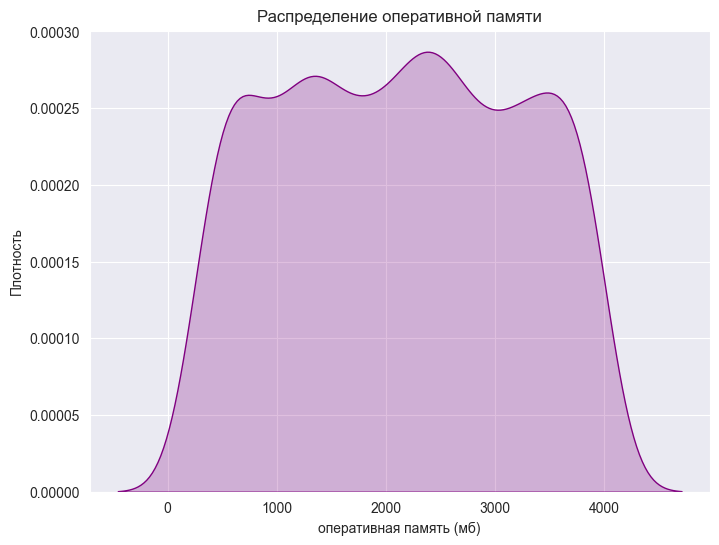

In [41]:
# Visualization. 3. График распределения оперативной памяти ('ram') по доле устройств
plt.figure(figsize=(8, 6))
sns.kdeplot(df['ram'], fill=True, color='purple', label='RAM Distribution')
plt.xlabel('оперативная память (мб)')
plt.ylabel('Плотность')
plt.title('Распределение оперативной памяти')
plt.grid(True)
plt.show()

## Вывод по визуализации 3
По этому графику мы видим распределение объема оперативной памяти по доле устройств с таким объемом. В среднем устройства обладают объемом от 500 мб до 3500, самый часто встречаемый объем ~2400 мб

# Correlation. Корреляция.
Постройте матрицу корреляций по количественным переменным и опишите зависимости, которые обнаружили 

Correlation matrix:
                clock_speed     m_dep  battery_power        fc  int_memory  ...  px_width       ram      sc_h      sc_w  talk_time
clock_speed       1.000000 -0.011400       0.010136 -0.006342    0.004461  ... -0.009050  0.004628 -0.026876 -0.005777  -0.010122
m_dep            -0.011400  1.000000       0.034834  0.004310    0.006426  ...  0.022394 -0.011402 -0.027314 -0.019880   0.015418
battery_power     0.010136  0.034834       1.000000  0.020317   -0.008197  ... -0.008205 -0.000121 -0.023784 -0.016533   0.047909
fc               -0.006342  0.004310       0.020317  1.000000   -0.025745  ... -0.012505  0.019440  0.000372 -0.001778  -0.008136
int_memory        0.004461  0.006426      -0.008197 -0.025745    1.000000  ... -0.011010  0.033712  0.039791  0.012055  -0.010334
mobile_wt         0.011939  0.018595       0.002575  0.014011   -0.030009  ... -0.000128 -0.004555 -0.032044 -0.019790   0.010434
n_cores          -0.005638 -0.003834      -0.026451 -0.001971   -0.02

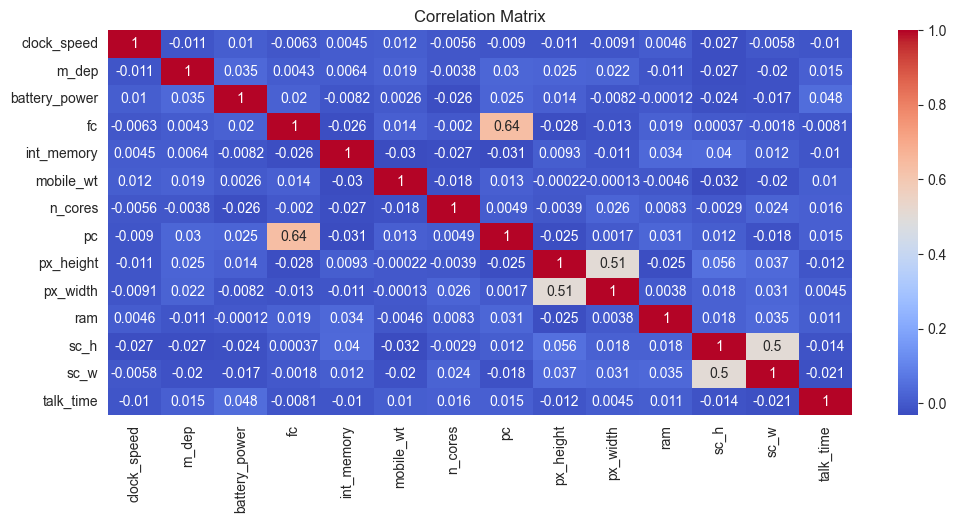

In [43]:
# Корреляция. 1. Постройте матрицу корреляции для количественных переменных
correlation_matrix = df[numeric_columns].corr()
print("Correlation matrix:\n", correlation_matrix)
plt.figure(figsize=(12, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Correlation. 2. Опишите зависимости, которые обнаружили
- _Средняя положительная_ между признаками _fc_ (качество изображения фронтальной камеры в мегапикселях) и _pc_ (качество основной камеры в мегапикселях). Значит, качество фронтальной камеры зачастую зависит от качества основной камеры.
- _Средняя положительная_ между признаками _px_height_ и _px_width_. Это логично, потому что самое распространённое разрешение экрана - 4x3 или 16x9, а разрешения указывают на отношение количества пикселей по длине к количеству пикселей по ширине.
- _Средняя положительная_ между признаками _sc_h_ и _sc_w_. Эта корреляция следует из прошлой, потому что все пиксели квадратные, значит отношение пикселей по сторонам будет такое же, как отношению длин сторон в сантиметрах

# Hypotheses. Тестирование гипотез
Реализуйте 3 из предложенных 5 гипотез на выбор

In [15]:
# Hypotheses. 1. "The average score of an anime is 7.5". 
# I use a z-test for mathematical expectation

print(f'Hypothesis: The average score of an anime is 7.5.\n'
      f'z-test was used')
alpha = 0.05
mean_score = df['Score'].mean()
std_score = df['Score'].std()
n = len(df['Score'])
z_score = (mean_score - 7.5) / (std_score / np.sqrt(n))
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_score)))  # two-tailed test
if p_value < alpha:
    print(f"    Rejecting the null hypothesis, there is a significant difference.\n"
          f"    z_score = {z_score}, p_value = {p_value}")
else:
    print(f'    Do not reject the null hypothesis, there is no significant difference.\n'
          f'    z_score = {z_score}, p_value = {p_value}')

Hypothesis: The average score of an anime is 7.5.
z-test was used
    Rejecting the null hypothesis, there is a significant difference.
    z_score = 70.5782889421253, p_value = 0.0


#### Гипотеза оказалась неверной, p_value слишком мало, поэтому делаем вывод о том, что средняя оценка аниме по всему датасету далека от значения 7.5

In [16]:
# Hypotheses. 2. "The average score of anime with a high number of members is different from the overall average score".
# I use a t-test to check this hypothesis.

print(f'Hypothesis: The average score of anime with a high number of members is different from the overall average score.\n'
      f't-test was used')
alpha = 0.05

high_members_threshold = df['Members'].quantile(0.75)  # Top 25% of anime by number of members
high_members_df = df[df['Members'] > high_members_threshold]
overall_mean_score = df['Score'].mean()

t_stat, p_value = stats.ttest_1samp(high_members_df['Score'], overall_mean_score)

if p_value < alpha:
    print(f"    Rejecting the null hypothesis, there is a significant difference.\n"
          f"    t_stat = {t_stat}, p_value = {p_value}")
else:
    print(f"    Do not reject the null hypothesis, there is no significant difference."
          f"    t_stat = {t_stat}, p_value = {p_value}")

Hypothesis: The average score of anime with a high number of members is different from the overall average score.
t-test was used
    Rejecting the null hypothesis, there is a significant difference.
    t_stat = 2.787885691560172, p_value = 0.005814488166120818


#### Гипотеза оказалась неверной, p_value слишком мало, поэтому делаем вывод о том, что средняя оценка аниме с высоким показателем количества участников в нём, не сильно отличается от средней оценки аниме по всему датасету


In [17]:
# Hypotheses. 3. "The average score of TV series is different from movies". 
# I use a test for the equality of mathematical expectations of two samples 
print(f'Hypothesis: The average score of TV series is different from movies\n'
      f'Test for equality of means was used')
alpha = 0.05

tv_scores = df[df['Type'] == 'TV']['Score']
movie_scores = df[df['Type'] == 'Movie']['Score']
t_stat, p_value = stats.ttest_ind(tv_scores, movie_scores)

if p_value < alpha:
    print(f"    Rejecting the null hypothesis, there is a significant difference.\n"
          f"    t_stat = {t_stat}, p_value = {p_value}")
else:
    print(f"    Do not reject the null hypothesis, there is no significant difference.\n"
          f"    t_stat = {t_stat}, p_value = {p_value}")

Hypothesis: The average score of TV series is different from movies
Test for equality of means was used
    Do not reject the null hypothesis, there is no significant difference.
    t_stat = 1.3905721535713722, p_value = 0.16484157754588452


#### Гипотеза оказалась верной, p_value достаточное, чтобы сделать вывод о том, что средняя оценка многосерийного аниме, показанного по TV, отличается от средней оценки полнометражного аниме 

# Regression. Задача регрессии или классификации
Постройте линейную или логистическую регрессию и оцените качество модели. Сделайте выводы

In [18]:
# Regression. 1. Build a linear or logistic regression of at least 3 features

# Creating of column "Premiere_age" based on number of seasons since 1980 winter
df['Premiere_age'] = df['Premiered'].apply(calculate_seasons_since_1980)

# Predicting Score based on Popularity, Members, and Duration_in_minutes, Premiere_age
X = df[['Popularity', 'Members', 'Duration_in_minutes', 'Premiere_age']]
y = df['Score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Regression. 2. Evaluate the quality of the model
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 0.0628854328285019
R-squared: 0.050733429358930104
Mean Absolute Error: 0.20814488856528904


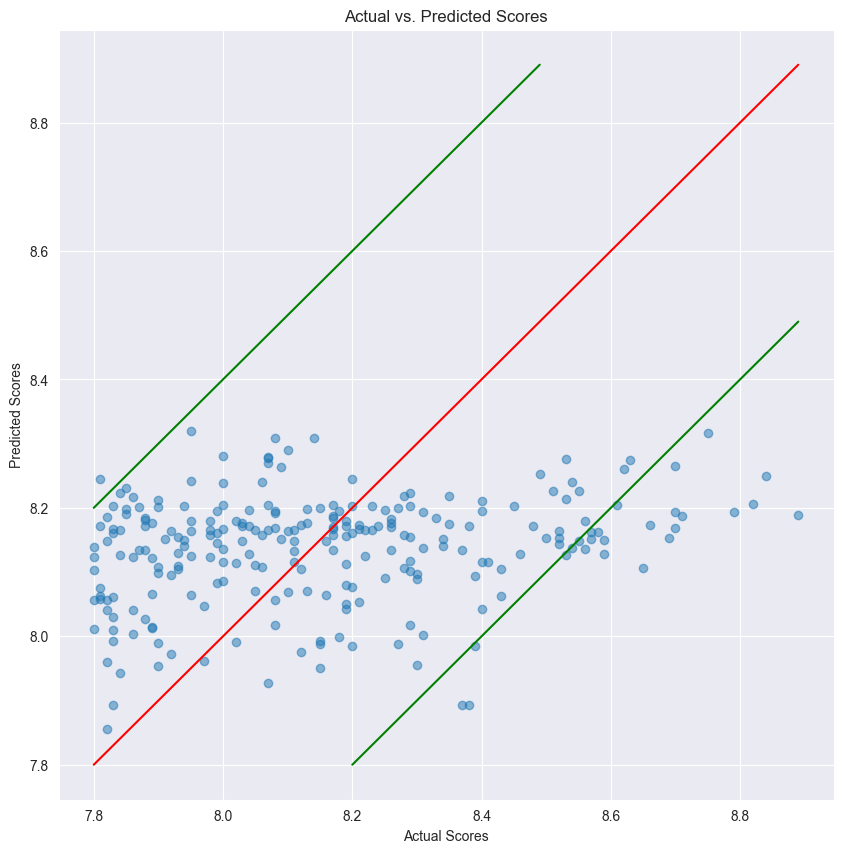

In [37]:
# Visualization of regression (optional)

# Predict the scores on the test set
y_pred = model.predict(X_test)

# Plot the actual vs predicted scores 
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # A reference line
plt.plot([min(y_test) + 0.4, max(y_test)], [min(y_test), max(y_test) - 0.4], color='green') # A line below reference line 
plt.plot([min(y_test), max(y_test) - 0.4], [min(y_test) + 0.4, max(y_test)], color='green') # A line above reference line
plt.show()

# Regression. 3. Сделайте развернутые выводы

Ради удобства помимо оценки качества модели я сделала график, отражающий соответствие предсказанного рейтинга по нашей модели регрессии к реальному рейтингу. На нём на красной линии лежат те аниме, по которым предполагаемая оценка полностью совпала с реальной, чем дальше расположены точки от красной линии - тем меньше соответствие предположений с действительностью. Зелёные линии нарисованы так, что практически все точки расположены между ними. Зелёные линии - примерные границы разброса, нарисованные на расстоянии 0.4 от красной.  
По графику видим, что отклонения ожидаемых оценок аниме от действительных составляют примерно 0.8 (по 0.4 в каждую сторону)

#### Анализ оценок качества модели

1. Среднеквадратичная ошибка (MSE): MSE = 0,06388308040383955. Это среднее значение квадратов ошибок между прогнозируемыми значениями и фактическими значениями. __Значения, близкие к нулю, являются лучшими__. В нашем случае MSE относительно низкий, что говорит о том, что прогнозы нашей модели достаточно близки к истинным значениям.
2. Средняя абсолютная ошибка (MAE): MAE = 0,2096900287131602. Это средняя величина ошибок в наборе прогнозов без учета их направления. Это среднее значение по тестовой выборке абсолютных различий между прогнозами и фактическими наблюдениями, при котором все индивидуальные различия имеют одинаковый вес. __Значение MAE, близкие к нулю, являются лучшими__. В нашем случае MAE = 0,2097 относительно низкий, что говорит о том, что прогнозы нашей модели достаточно близки к истинным значениям.
3. R-квадрат (R-squared): R2 = 0,03567376530077104. Это статистический показатель того, насколько данные близки к заданной линии регрессии. Оно также известно как коэффициент детерминации или коэффициент множественной детерминации для множественной регрессии. Чем выше значение R2, тем лучше модель соответствует вашим данным. __Значения, близкие к единице, являются лучшими__. Наше значение 0,0357 является довольно низким, что указывает на то, что только около 3,57% вариабельности оценок аниме можно объяснить входными данными модели. 
 
#### По итогу, наша модель имеет низкие значения MSE и MAE, что отражает точность нашей модели, но значение R2 очень низкое, что говорит о том, что модель не объясняет большую часть различий в данных. Из выполнения текущего раздела работы можно сделать вывод, что выбранные признаки (популярность аниме, количество участников, длительность аниме, возраст премьеры) лишь немного влияют на оценку аниме экспертами. Было бы полезно изучить другие переменные, которые могли бы улучшить объяснительную способность модели. Однако на данный момент мы изучали зависимость рейтинга от количественных признаков, однако существует еще много номинальных характеристик аниме, которые могут значительно влиять на оценку, однако это уже не количественные признаки, поэтому мы редко их рассматривали и не строили модель регрессии относительно них.